In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
thedata = pd.read_csv('C:/Users/mani7/OneDrive/Desktop/NTU CEG/Y1S2/SC1015/project/diabetes.csv')
thedata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
thedata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Cleaning the data to remove column irrelevant to our problem solution

In [6]:
# List of columns to remove
columns_to_remove = ['SkinThickness', 'Age']

# Drop the specified columns
cleaned_df = thedata.drop(columns=columns_to_remove)
cleaned_df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,0,33.6,0.627,1
1,1,85,66,0,26.6,0.351,0
2,8,183,64,0,23.3,0.672,1
3,1,89,66,94,28.1,0.167,0
4,0,137,40,168,43.1,2.288,1


### EDA

C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

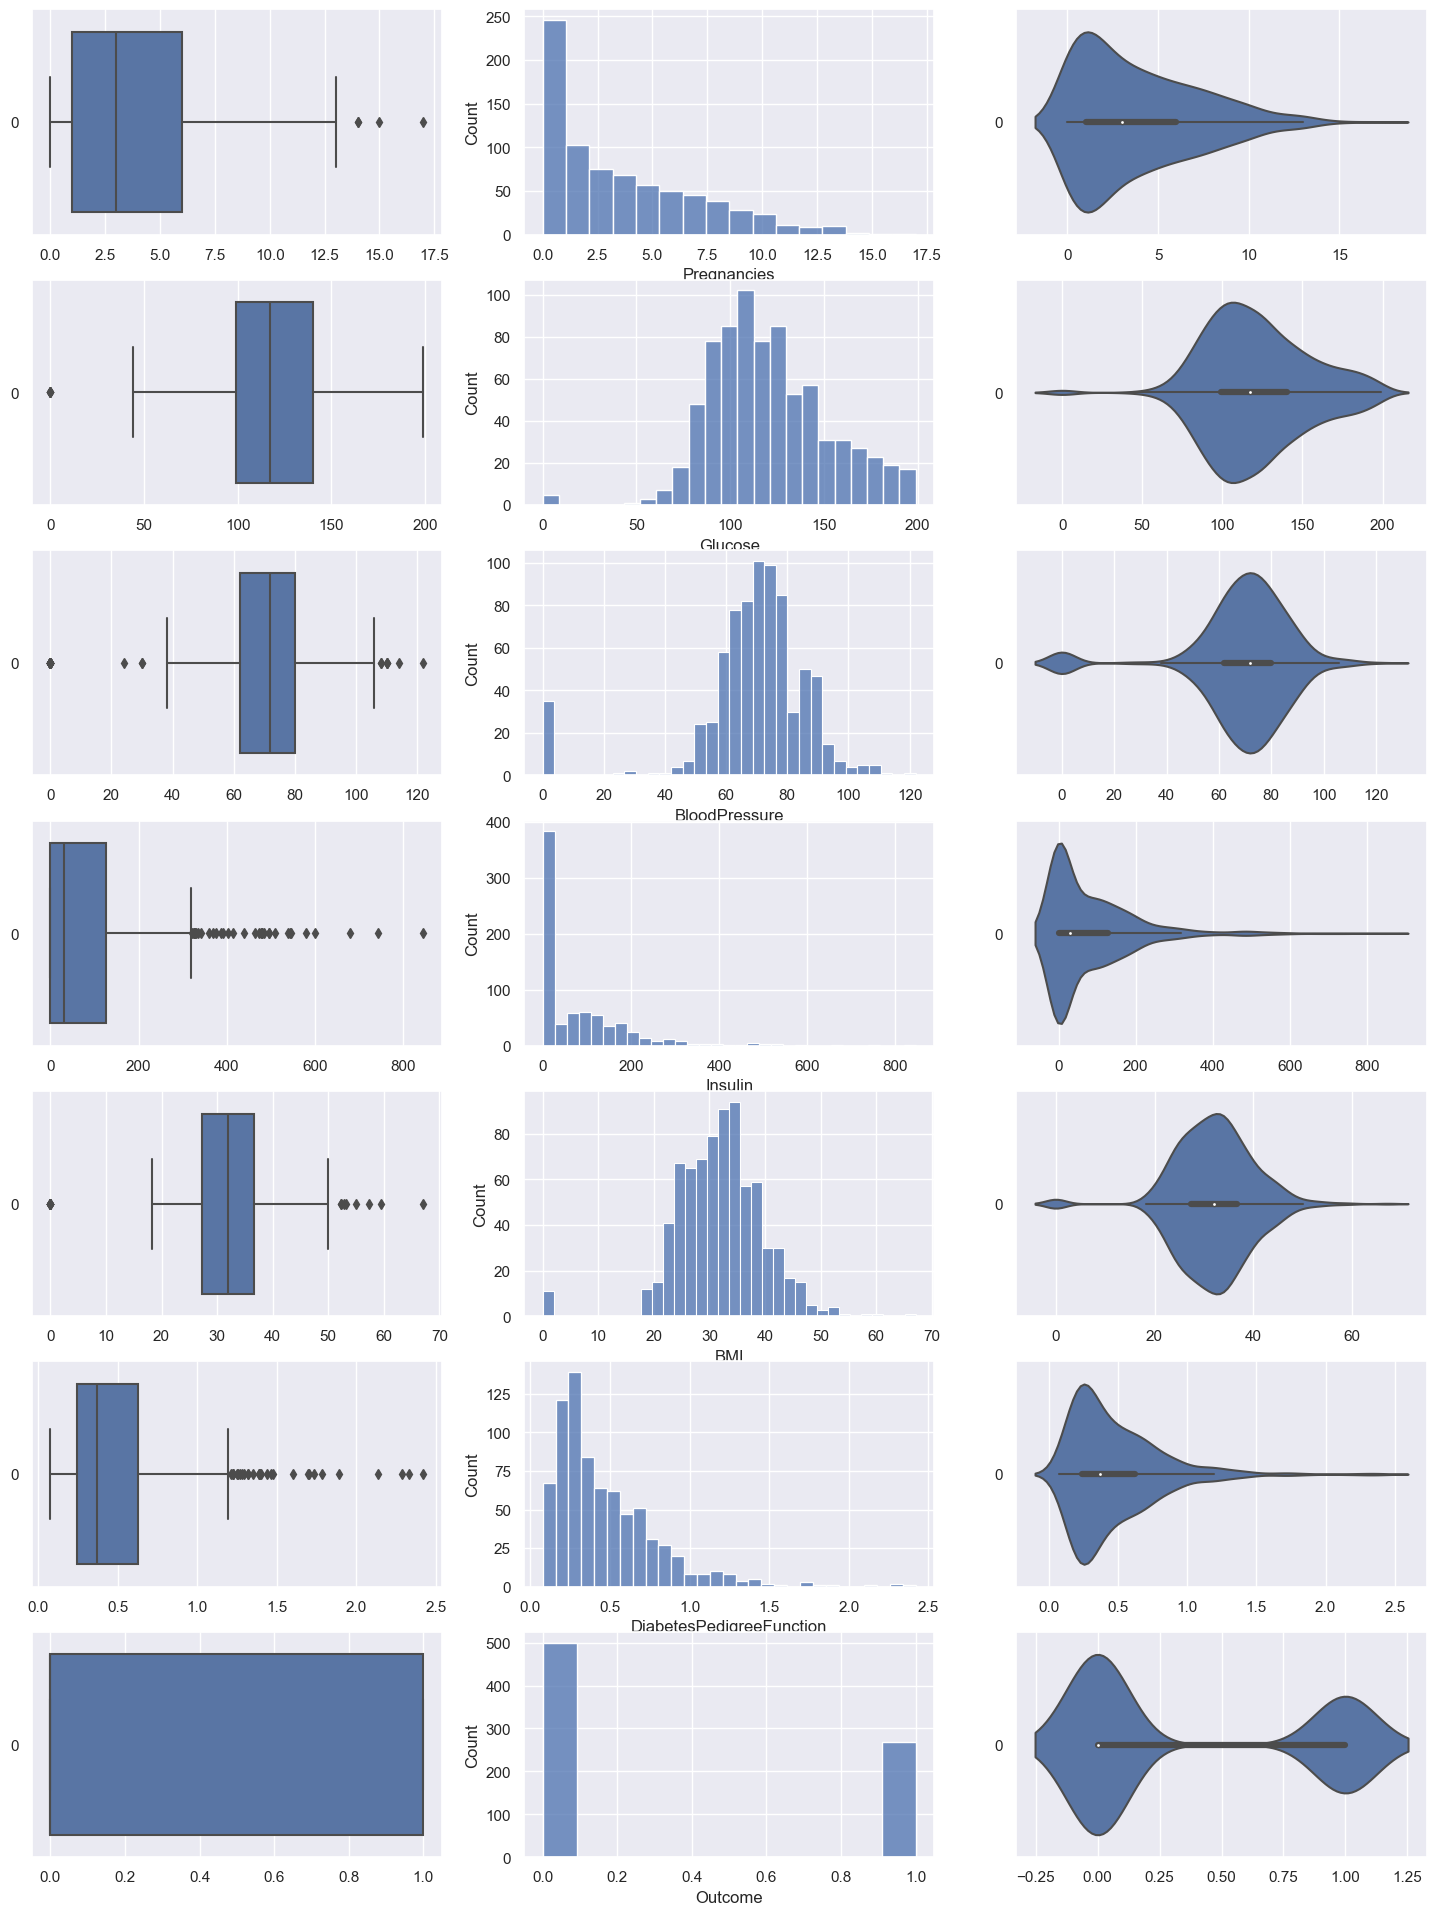

In [17]:
cleaned_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Draw the distributions of all variables
f, axes = plt.subplots(7, 3, figsize=(18, 24))

count = 0
for var in cleaned_df:
    sb.boxplot(data = cleaned_df[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = cleaned_df[var], ax = axes[count,1])
    sb.violinplot(data = cleaned_df[var], orient = "h", ax = axes[count,2])
    count += 1

<Axes: >

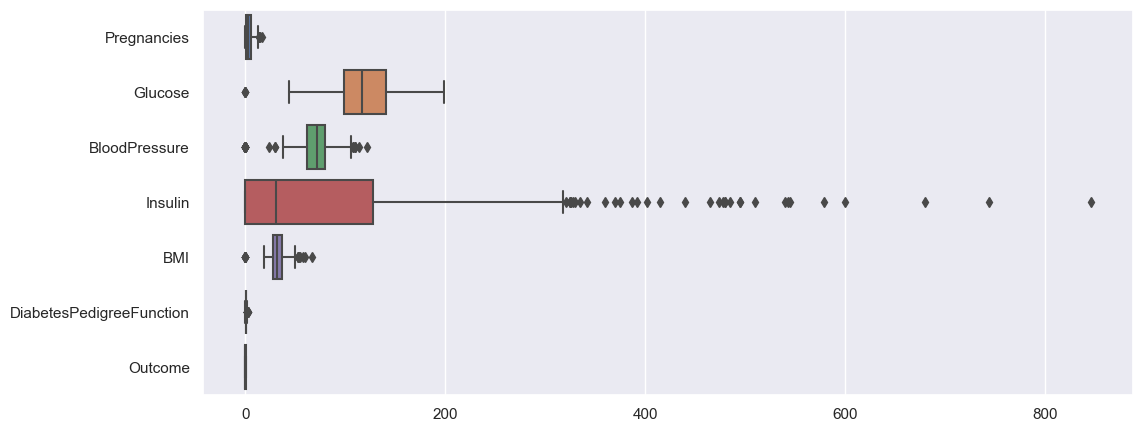

In [31]:
f = plt.figure(figsize=(12, 5))
sb.boxplot(data = cleaned_df, orient = "h")

#### Showing the relationship between glucose and insulin

In [32]:
thedata2 = pd.DataFrame(cleaned_df[["Glucose", "Insulin"]])
thedata2.describe()

,Glucose,Insulin
count,768.000000,768.000000
mean,120.894531,79.799479
std,31.972618,115.244002
min,0.000000,0.000000
25%,99.000000,0.000000
50%,117.000000,30.500000
75%,140.250000,127.250000
max,199.000000,846.000000


C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

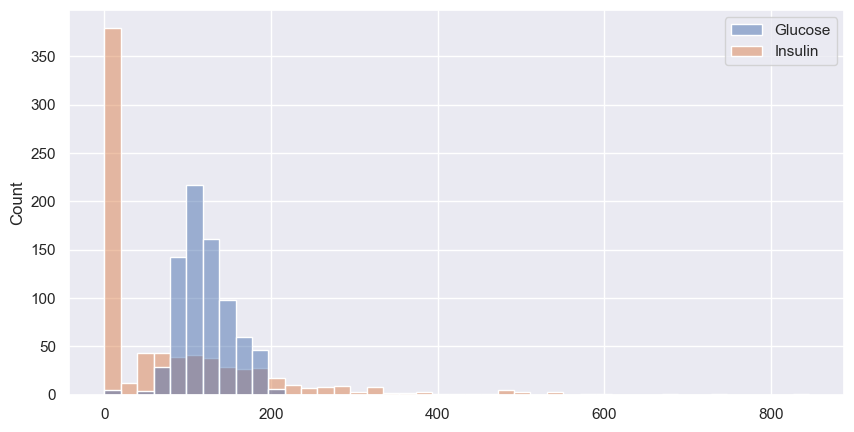

In [33]:
f = plt.figure(figsize=(10, 5))
sb.histplot(data = thedata2)

The above graph shows no clear link between the two. While insulin levels might respond to glucose, there's no strong upward or downward trend, suggesting high variability. Hence, no definitive conclusion can be drawn using the above visual representation.  

In [34]:
jointddata = pd.concat([cleaned_df["Insulin"], cleaned_df["Glucose"]], axis = 1).reindex(cleaned_df["Glucose"].index)
jointddata

,Insulin,Glucose
0,0,148
1,0,85
2,0,183
3,94,89
4,168,137
...,...,...
763,180,101
764,0,122
765,112,121
766,0,126


C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


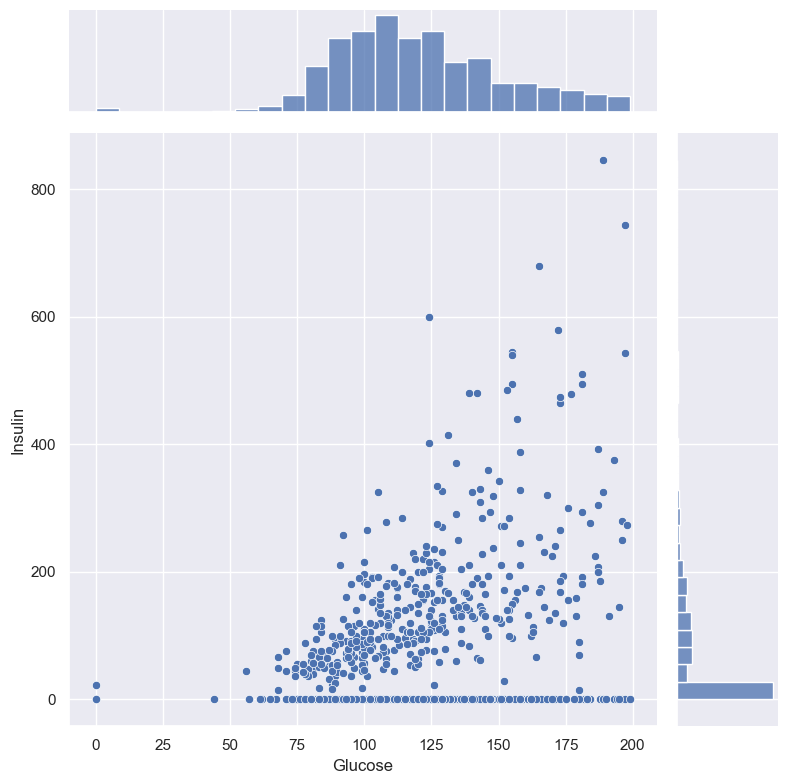

In [29]:
sb.jointplot(data = jointddata, x = "Glucose", y = "Insulin", height = 8)

In the above plot, we can observe a weak correlation between glucose and insulin levels in our dataset. It shows that data points don't form a perfect line but show a faint upward trend from left to right.: Some points could deviate from the trend, suggesting factors besides glucose might influence insulin levels .

In [35]:
jointddata2 = pd.concat([cleaned_df["BMI"], cleaned_df["Glucose"]], axis = 1).reindex(cleaned_df["Glucose"].index)
jointddata2

,BMI,Glucose
0,33.6,148
1,26.6,85
2,23.3,183
3,28.1,89
4,43.1,137
...,...,...
763,32.9,101
764,36.8,122
765,26.2,121
766,30.1,126


C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


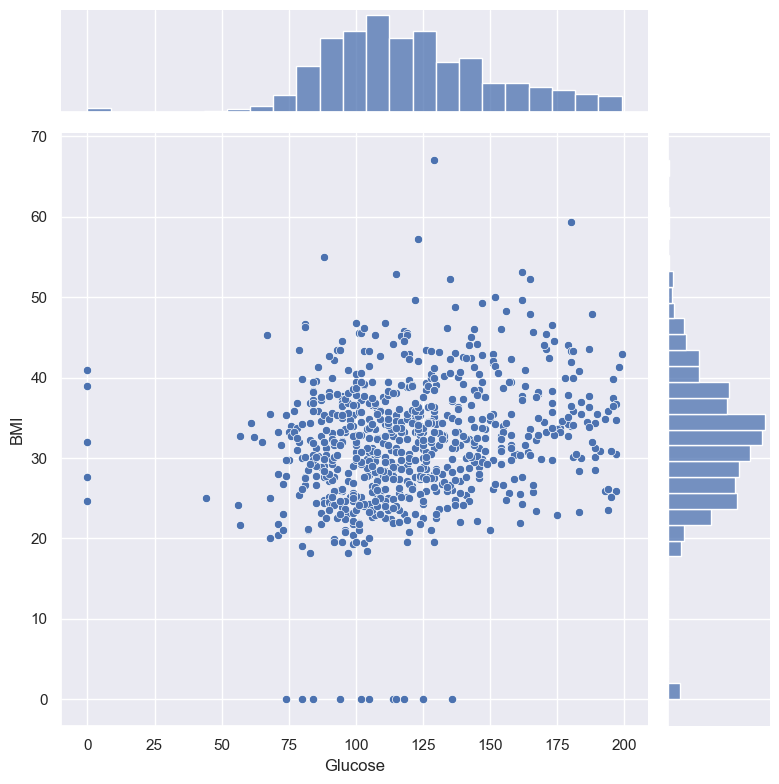

In [36]:
sb.jointplot(data = jointddata2, x = "Glucose", y = "BMI", height = 8)

The scatter plot shows a positive correlation between BMI and glucose. This means that as BMI increases, blood glucose levels also tend to increase.  However, it is important to note that correlation does not necessarily imply causation. There could be other factors that influence both BMI and blood glucose levels

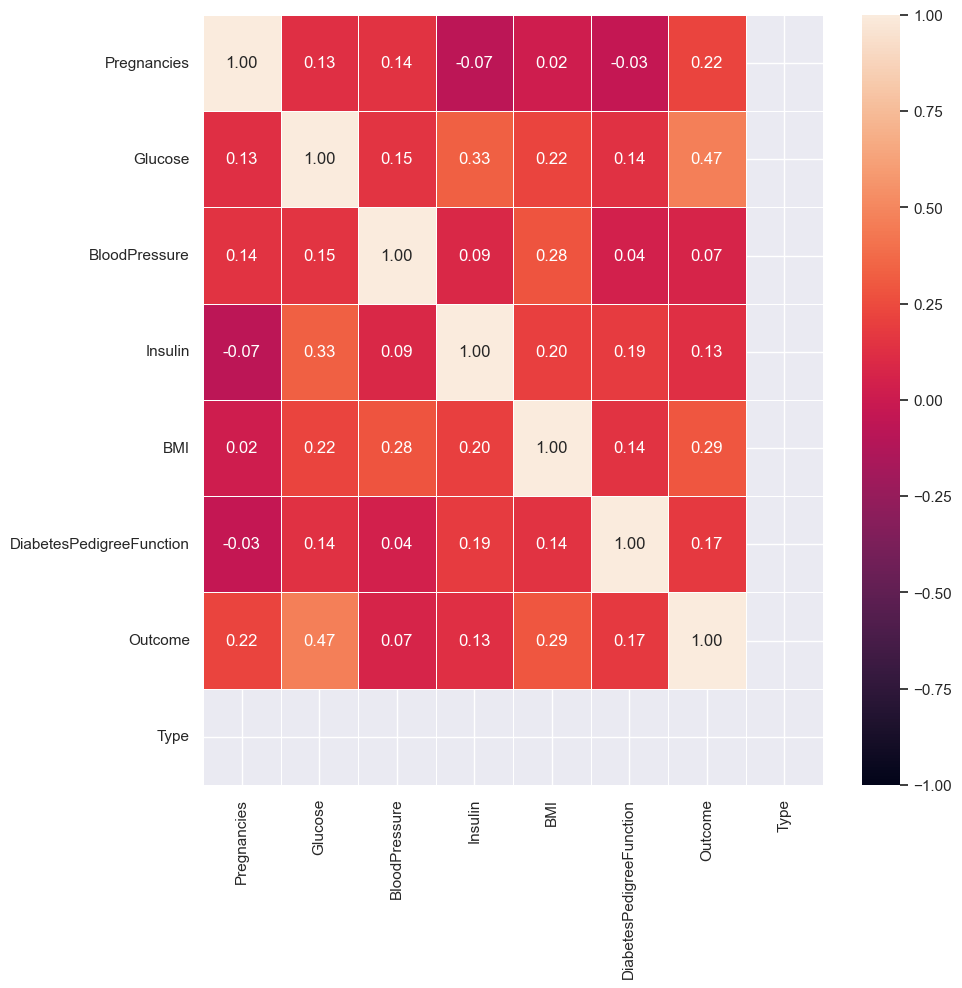

In [4]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(10, 10))
heatmap = sb.heatmap(cleaned_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", linewidths=.5)
heatmap.set_aspect('auto')

Based on the heatmap that we have, we can see that glucose is the one variable with the highest relationship with the outcome, so the fact that people have diabetes.
Also, the insulin level might be most related to skin thickness and glucose. While glucose has the maximum effect BMI stands second

In [9]:
# Diabetes poeple in the Dataset
legnd_data = cleaned_df[cleaned_df["Outcome"] == True]
print("Number of Diabetes poeple :", len(legnd_data))

Number of Diabetes poeple : 268


C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

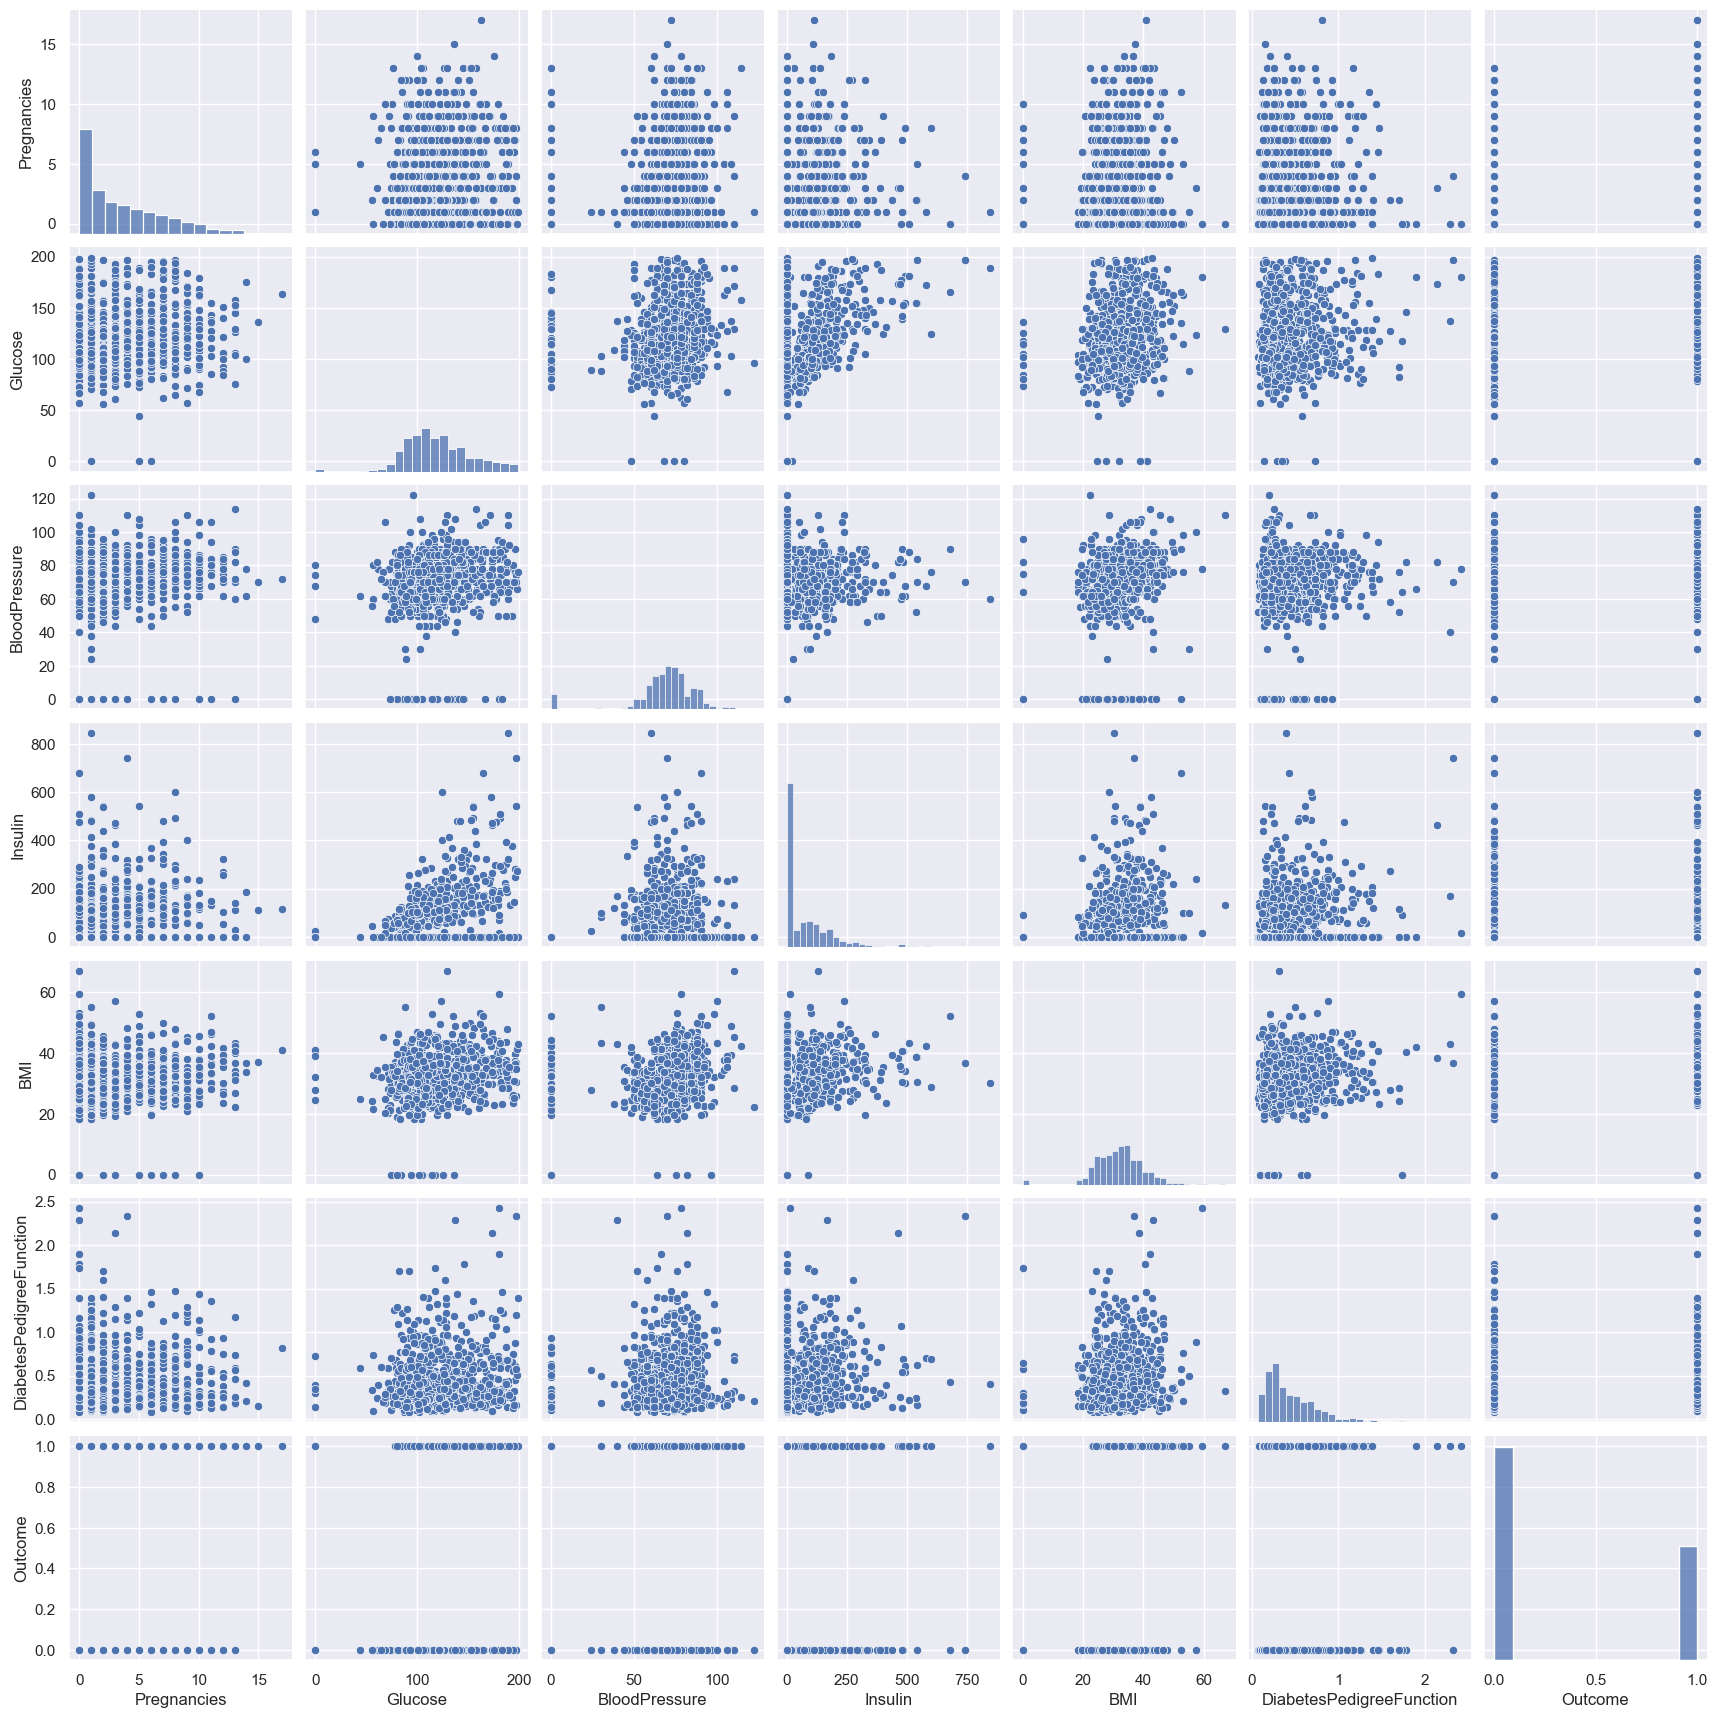

In [10]:
# Draw pairs of variables against one another
sb.pairplot(data = cleaned_df)

In [18]:
# People with the highest level of insulin -- the Top 10
cleaned_df.sort_values('Insulin', ascending=False).head(10)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
13,1,189,60,846,30.1,0.398,1
228,4,197,70,744,36.7,2.329,0
247,0,165,90,680,52.3,0.427,0
584,8,124,76,600,28.7,0.687,1
409,1,172,68,579,42.4,0.702,1
286,5,155,84,545,38.7,0.619,0
8,2,197,70,543,30.5,0.158,1
655,2,155,52,540,38.7,0.240,1
753,0,181,88,510,43.3,0.222,1
186,8,181,68,495,30.1,0.615,1


In [19]:
# People with the highest level of glucose -- the Top 10
cleaned_df.sort_values('Glucose', ascending=False).head(10)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
661,1,199,76,0,42.9,1.394,1
561,0,198,66,274,41.3,0.502,1
228,4,197,70,744,36.7,2.329,0
8,2,197,70,543,30.5,0.158,1
579,2,197,70,0,34.7,0.575,1
408,8,197,74,0,25.9,1.191,1
359,1,196,76,249,36.5,0.875,1
22,7,196,90,0,39.8,0.451,1
206,8,196,76,280,37.5,0.605,1
675,6,195,70,0,30.9,0.328,1


With those two TOP 10, we can see that when we classify the people with the highest level of glucose, we have 9 out of 10 who have diabetes. But when we classify the people with the highest level of insulin, we have 7 out of 10 who have diabetes.

In [21]:
import matplotlib.pyplot as plt
sb.set()
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Outcome', ylabel='Glucose'>

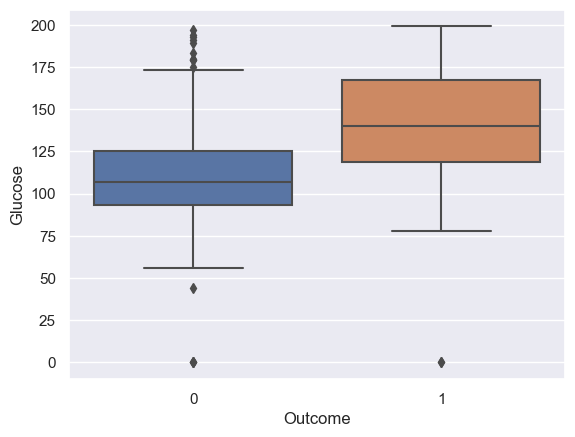

In [22]:
sns.boxplot(x='Outcome', y='Glucose', data=cleaned_df)

We used the box plot to conclude that people with diabetes have high glucose.